# Análisis grafo

**Autores:**

- José Antonio Nazar Alaez (jose.nazar@cunef.edu)

- Francisco Martínez García (f.martinezgarcia@cunef.edu)

En este notebook realizaremos un análisis de los datos utilizando grafos con la librería networkx

# Functions

In [18]:
def draw_graph(pd_punctuation, column):
    G = nx.Graph()
    G = nx.from_pandas_edgelist(pd_punctuation, 'stars', column)

    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G,pos,cmap=plt.get_cmap('jet'))
    nx.draw_networkx_labels(G,pos)
    black_edges = G.edges
    nx.draw_networkx_edges(G,pos,edgelist=G.edges,arrows=True)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)


# Librería

In [19]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

# Datos

In [20]:
#Read the traing data
pd_punctuation = pd.read_parquet('./data/training_grapho.parquet')

In [35]:
pd_punctuation.head()

,review_count,is_open,Health & Medical,Shipping Centers,Shopping,Restaurants,Automotive,Active Life,Arts & Entertainment,Event Planning & Services,Hotels & Travel,Beauty & Spas,useful,funny,cool,punctuation
51735,31,1,0,0,0,0,0,0,1,0,0,0,1.00,0.32,0.52,1
1649,112,1,0,0,0,1,0,0,0,0,0,0,0.53,0.29,0.33,0
67144,20,1,0,0,0,0,0,0,0,1,0,0,0.73,0.05,0.32,0
56745,22,0,0,0,0,1,0,0,0,0,0,0,1.87,0.78,1.26,1
9045,324,1,0,0,0,1,0,0,0,0,0,0,0.79,0.16,0.33,1


# Grafos

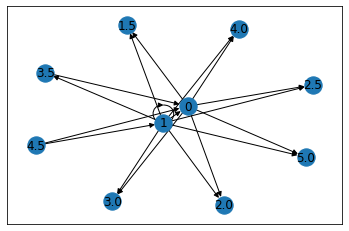

In [21]:
draw_graph(pd_punctuation, 'is_open')

Este grafo nos muestra los valores 0 (esta cerrado) y 1 (está abierto). De este grafo podemos destacar principalmente si los establecimientos con más estrellas se encuentran abiertos o cerrados. Observamos que algunos establecimientos con 4, 4.5 y  y 5 estrellas que están cerrados lo que indica que posiblemente cerraron posteriormente a su valoración por el usuario.

**En los siguientes grafos vamos a ver que categorias se llevan la mejor puntuación por el usuario.**

En los siguientes grafos se representa una categoría que toma valor 1 cuando es de esa categoría y 0 cuando no lo es. Por ejemplo en el primer grafo toma valor 1 cuando sea Health & Medical y 0 cuando no lo sea. Nos interesa saber las estrellas cuando toma valor 1.

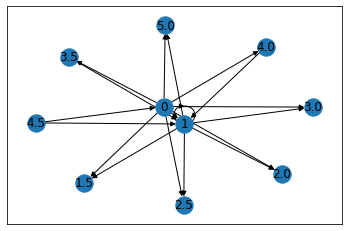

In [22]:
draw_graph(pd_punctuation, 'Health & Medical')

En este grafo se puede observar que la categoría Health & Medical recibe una puntuación de estrellas positiva por parte de los usuarios

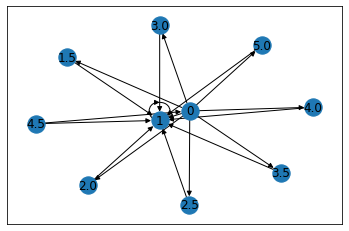

In [23]:
draw_graph(pd_punctuation, 'Shipping Centers')

De este grafo podemos concluir, que la categoría shipping centers recibe una puntuación de estrellas tanto positiva como 
negativa recibiendo todo tipo de valoraciones por parte de los usuarios

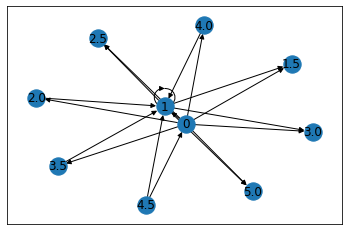

In [24]:
draw_graph(pd_punctuation, 'Shopping')

En este grafo observamos que la categoría shopping recibe una puntuación de estrellas bastante equilibrada como la categoría Shipping Centers.

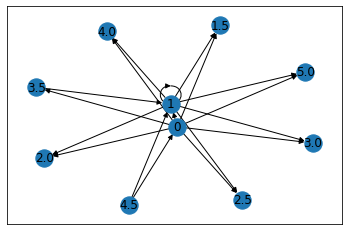

In [25]:
draw_graph(pd_punctuation, 'Restaurants')

Si observamos el grafo vemos como la categoría Restaurants recibe una puntuación media de estrellas

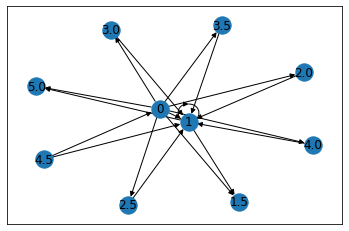

In [26]:
draw_graph(pd_punctuation, 'Automotive')

En este grafo vemos como la categoría Automotive recibe una puntuación de estrellas baja y alta manteniendo un equilibrio de puntuación.

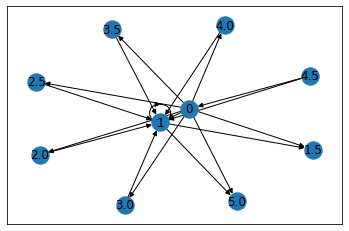

In [27]:
draw_graph(pd_punctuation, 'Active Life')

Al observar el grafo vemos que los usuarios otorgan a la categoría Active Life una puntuación tanto baja como alta

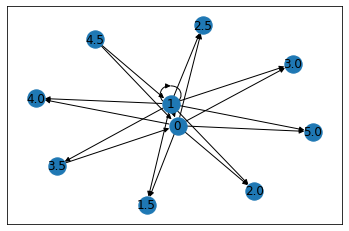

In [28]:
draw_graph(pd_punctuation, 'Arts & Entertainment')

En este grafo, que representa a la categoría Arts & Entertainment podemos destacar la poca puntuación que recibe por parte de los usuarios.

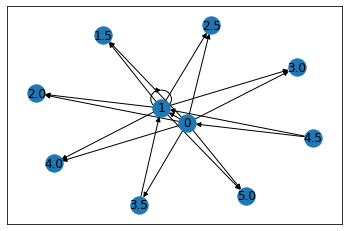

In [29]:
draw_graph(pd_punctuation, 'Event Planning & Services')

De este grafo concluimos que la categoría Event Planning & Services recibe muy poca puntuación por parte de los usuarios , los cuales le otorgan una puntuación media

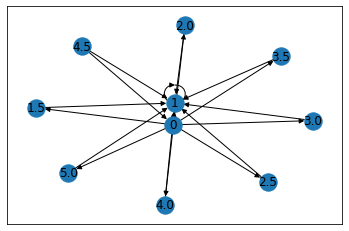

In [30]:
draw_graph(pd_punctuation, 'Hotels & Travel')

De la categoría Hotels & Travel es interesante destacar la gran cantidad de puntuaciones que recibe por parte de los usuarios. En general, las puntuaciones son equilibradas recibiendo tanto puntuaciones altas como bajas

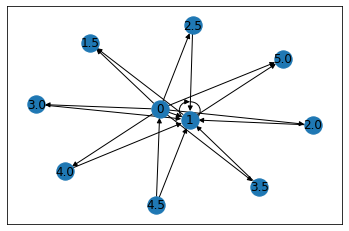

In [31]:
draw_graph(pd_punctuation, 'Beauty & Spas')

Por último la categoría Beauty & Spas le ocurre lo mismo que la anterior categoría recibiendo una gran variedad de puntuaciones por parte de los usuarios.

Para concluir, destacamos que las categorías Shipping Centers, Shopping, Automotive, Active Life, Hotels & Travel, Beauty & Spas son las más puntuadas por los usuarios recibiendo distintos tipos de valoraciones.

In [33]:
# Remove the column "stars" that I have used in the graphs and I no longer need it
pd_punctuation = pd_punctuation.drop('stars',axis=1)

In [34]:
# Save pd_punctuation in parquet
pd_punctuation.to_parquet("./data/training_data.parquet")